<a href="https://colab.research.google.com/github/dinarrahman30/Machine-Learning-Terapan/blob/main/Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Informasi Data Diri
Nama: Dinar Wahyu Rahman

Username Dicoding: dinar_wahyu

Email: dinarrahman30@gmail.com

LinkedIn: [Dinar Wahyu Rahman]('https:www.linkedin.com/in/dinar-wahyu-rahman/')

# Recommender System (Sistem Rekomendasi)
Proyek akhir pada kelas Machine Learning Terapan by Dicoding Academy

## 1. Deskripsi Proyek Sistem Rekomendasi Destinasi Wisata di Indonesia dengan Content-Based Filtering

![Foto](https://opinijogja.com/wp-content/uploads/2023/02/Wisata.jpg)

Indonesia memiliki ribuan destinasi wisata dengan keindahan alam, budaya, dan kuliner yang menarik. Namun, dengan begitu banyak pilihan, wisatawan sering kali bingung menentukan destinasi yang sesuai dengan preferensi pribadi. Oleh karena itu, dibutuhkan sistem rekomendasi berbasis fitur destinasi yang dapat membantu pengguna menemukan tempat wisata yang relevan berdasarkan karakteristik tempat dan preferensi mereka.

### 1.1. Import library yang dibutuhkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 1.2. Data Collection

Dataset diambil dari situs [Kaggle](https://www.kaggle.com/aprabowo/indonesia-tourism-destination)

In [2]:
!pip install kaggle

In [3]:
!kaggle datasets download -d aprabowo/indonesia-tourism-destination

Dataset URL: https://www.kaggle.com/datasets/aprabowo/indonesia-tourism-destination
License(s): copyright-authors
  0% 0.00/158k [00:00<?, ?B/s]
100% 158k/158k [00:00<00:00, 56.6MB/s]


In [4]:
!unzip /content/indonesia-tourism-destination.zip

Archive:  /content/indonesia-tourism-destination.zip
  inflating: package_tourism.csv     
  inflating: tourism_rating.csv      
  inflating: tourism_with_id.csv     
  inflating: user.csv                


Dalam dataset terdapat 4 buah file bertipe csv (Comma-Seperated Values), yaitu
- `tourism_with_id.csv`: mengandung informasi tempak wisata di 5 kota besar di Indonesia (hanya kota Yogyakarta yang dipakai).
- `user.csv`: mengandung informasi pengguna untuk membuat rekomendasi fitur berdasar pengguna.
- `tourism_rating.csv`: mengandung informasi pengguna, tempat wisata, dan rating untuk membuat sistem rekomendasi berdasar rating.
- `package_tourism.csv`: berisi rekomendasi tempat terdekat berdasarkan waktu, biaya, dan peringkat.


## 2. Data Understanding

In [5]:
df_rating = pd.read_csv("/content/tourism_rating.csv")
df_tourism = pd.read_csv("/content/tourism_with_id.csv")
df_user = pd.read_csv("/content/user.csv")
df_package = pd.read_csv("/content/package_tourism.csv")

print(df_rating.head())
print("-" * 50)
print(df_tourism.head())
print("-" * 50)
print(df_user.head())
print("-" * 50)
print(df_package.head())

   User_Id  Place_Id  Place_Ratings
0        1       179              3
1        1       344              2
2        1         5              5
3        1       373              3
4        1       101              4
--------------------------------------------------
   Place_Id                         Place_Name  \
0         1                   Monumen Nasional   
1         2                           Kota Tua   
2         3                      Dunia Fantasi   
3         4  Taman Mini Indonesia Indah (TMII)   
4         5           Atlantis Water Adventure   

                                         Description       Category     City  \
0  Monumen Nasional atau yang populer disingkat d...         Budaya  Jakarta   
1  Kota tua di Jakarta, yang juga bernama Kota Tu...         Budaya  Jakarta   
2  Dunia Fantasi atau disebut juga Dufan adalah t...  Taman Hiburan  Jakarta   
3  Taman Mini Indonesia Indah merupakan suatu kaw...  Taman Hiburan  Jakarta   
4  Atlantis Water Adventure atau

Untuk pemodelan machine learning pada kasus ini, kita hanya akan menggunakan file `tourism_with_id.csv`

#### 2.1. Exploratory Data Analytics (EDA)

In [6]:
print(df_tourism.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB
None


Dari output `.info()` dapat disimpulkan bahwa:
- `Place_Id`: ID dari setiap tempat wisata yang digunakan untuk membedakan tempat satu dengan lainnya.
- `Place_Name`: Nama tempat wisata
- `Description`: Deskripsi singkat tentang tempat wisata, mencakup informasi utama yang menarik perhatian wisatawan, seperti daya tarik utama atau sejarah singkat.
- `Category`: Kategori tempat wisata, seperti "Budaya", "Sejarah", "Alam", atau "Kuliner".
- `City`: Kota tempat wisata tersebut berada, misalnya "Yogyakarta".
- `Price`: Harga masuk atau biaya yang diperlukan untuk menikmati tempat wisata tersebut (dapat berupa nominal dalam mata uang tertentu).
- `Rating`: Penilaian rata-rata dari pengunjung, biasanya dalam skala tertentu (misalnya 1-5).
- `Time_Minutes`: Estimasi waktu yang diperlukan untuk menikmati atau mengunjungi tempat wisata tersebut (dalam satuan menit).
- `Coordinate`: Informasi lokasi dalam bentuk koordinat geografis yang mungkin mencakup kombinasi latitude (Lat) dan longitude (Long).
- `Lat`: Latitude, yaitu garis lintang yang menunjukkan lokasi tempat wisata di peta.
- `Long`: Longitude, yaitu garis bujur yang menunjukkan lokasi tempat wisata di peta.
- `Unnamed: 11`: Kolom yang berisi nilai NaN.
- `Unnamed; 12`: Kolom yang berisi angka.

In [7]:
print("Shape of df_tourism:", df_tourism.shape)

Shape of df_tourism: (437, 13)


Dari eksekusi method `.shape` Terlihat:

| Jumlah Baris	| Jumlah Kolom |
| ------ | ------ |
| 437 |	13 |

#### 2.1.1. Checking Missing Value

In [8]:
# Cek data duplicated
df_tourism.duplicated().sum()

0

In [9]:
# Cek missing value
df_tourism.isnull().sum()

,0
Place_Id,0
Place_Name,0
Description,0
Category,0
City,0
Price,0
Rating,0
Time_Minutes,232
Coordinate,0
Lat,0


Kesimpulan dari sesi `Data Understanding`, didapat,
- Dataset memiliki 437 sample dengan jumlah kolom sebanyak 13.
- Terdapat fitur `Time_Minutes` dengan missing value sebanyak 232 dan kolom `Unnamed: 11` sebanyak 437.
- Tidak terdapat data yang duplikat.
- Dataset memiliki 3 fitur `int64`, 5 `object`, dan 5 `float64`.

In [10]:
df_copy_tourism = df_tourism.copy()

#### 2.1.2 Visualisasi Data

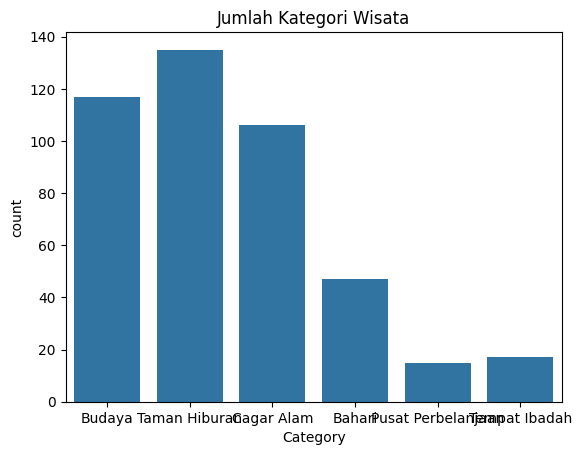

In [11]:
# Membuat visualisasi jumlah kategori wisata

sns.countplot(x='Category', data=df_copy_tourism)
plt.title('Jumlah Kategori Wisata')
plt.show()

Dari Grafik di atas dapat disimpulkan bahwa,
- Grafik ini akan menunjukkan frekuensi atau jumlah destinasi wisata yang terdaftar di setiap kategori. Jika satu kategori memiliki banyak destinasi wisata, itu menunjukkan bahwa kategori tersebut lebih populer atau lebih banyak tempat yang terdaftar dalam kategori tersebut.
- Dari jumlah bar pada grafik, kita dapat melihat kategori mana yang memiliki jumlah destinasi wisata terbanyak, dan mana yang memiliki jumlah sedikit. Misalnya, jika kategori "Alam" memiliki jumlah yang sangat tinggi dibandingkan dengan kategori "Kuliner", maka dapat disimpulkan bahwa lebih banyak destinasi wisata yang berkaitan dengan alam daripada kuliner dalam dataset tersebut.

Text(0.5, 0, 'Rating')

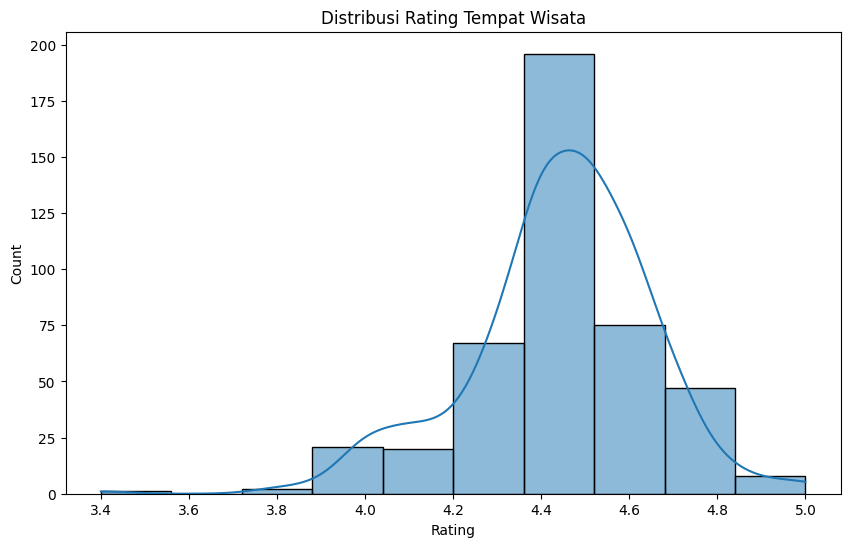

In [12]:
# Visualisasi rating tempat wisata

plt.figure(figsize=(10, 6))
sns.histplot(df_copy_tourism['Rating'], bins=10, kde=True)
plt.title('Distribusi Rating Tempat Wisata')
plt.xlabel('Rating')

Dari Grafik di atas dapat disimpulkan bahwa,
- Jika histogram menunjukkan distribusi yang terpusat di satu nilai tertentu (misalnya, banyak rating berkumpul di sekitar angka 4 atau 5), itu menunjukkan bahwa sebagian besar tempat wisata mendapatkan rating yang tinggi. Ini bisa menunjukkan kepuasan umum yang tinggi dari para pengunjung.
- Jika distribusi terlihat berdiri tegak dengan beberapa puncak 4.4-4.5, itu bisa menunjukkan adanya variasi dalam kepuasan pengguna. Artinya, ada banyak tempat wisata dengan rating yang berbeda-beda, yang bisa menunjukkan adanya perbedaan kualitas pengalaman wisata antara destinasi yang ada.

## 3. Data Preparation

#### 3.1. Menghapus Kolom yang Tidak Diperlukan

Namun, kita akan mendrop beberapa fitur yang tidak terpakai dalam membangun model rekomendasi _content-based filtering_ yaitu `Rating`, `Time_Minutes`, `Unnamed: 11`, dan `Unnamed: 12`.

In [13]:
# Drop kolom yang tidak akan dipakai untuk model rekomendasi content-based filtering
df_copy_tourism.drop(columns=['Unnamed: 11', 'Unnamed: 12', 'Time_Minutes', 'Coordinate', 'Lat', 'Long', 'Rating'], inplace=True)
print('Done')

Done


#### 3.2. Case Folding

Konversi karakter dari huruf besar ke huruf kecil pada kolom `Description`.

In [14]:
# Case folding pada kolom 'Description'
df_copy_tourism['Description'] = df_copy_tourism['Description'].str.lower()

#### 3.3. Data Cleaning

In [15]:
import re

df_copy_tourism['Description'] = df_copy_tourism['Description']

# Fungsi untuk menghapus huruf Jawa
def remove_javanese_characters(text):
    # Regex untuk huruf Jawa (unicode range: \uA980 - \uA9DF)
    pattern = r"[\uA980-\uA9DF]"
    return re.sub(pattern, "", text)

# Membersihkan huruf Jawa dari data
cleaned_data = [remove_javanese_characters(text) for text in df_copy_tourism['Description']]

# Menampilkan hasil
for original, cleaned in zip(df_copy_tourism['Description'], cleaned_data):
    print(f"Original: {original}")
    print(f"Cleaned:  {cleaned}")
    print()

Original: monumen nasional atau yang populer disingkat dengan monas atau tugu monas adalah monumen peringatan setinggi 132 meter (433 kaki) yang didirikan untuk mengenang perlawanan dan perjuangan rakyat indonesia untuk merebut kemerdekaan dari pemerintahan kolonial hindia belanda. pembangunan monumen ini dimulai pada tanggal 17 agustus 1961 di bawah perintah presiden soekarno dan dibuka untuk umum pada tanggal 12 juli 1975. tugu ini dimahkotai lidah api yang dilapisi lembaran emas yang melambangkan semangat perjuangan yang menyala-nyala. monumen nasional terletak tepat di tengah lapangan medan merdeka, jakarta pusat.
Cleaned:  monumen nasional atau yang populer disingkat dengan monas atau tugu monas adalah monumen peringatan setinggi 132 meter (433 kaki) yang didirikan untuk mengenang perlawanan dan perjuangan rakyat indonesia untuk merebut kemerdekaan dari pemerintahan kolonial hindia belanda. pembangunan monumen ini dimulai pada tanggal 17 agustus 1961 di bawah perintah presiden soe

## 4. Model Development

#### 4.1. TF-IDF Vectorizer



In [22]:
# prompt: Untuk mengubah kumpulan teks pada kolom Tags yang berisi kumpulan data pada kolom Category, City, dan Price menjadi representasi vektor menggunakan metode TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

# Menggabungkan kolom Category, City, dan Price menjadi satu kolom baru bernama 'Tags'
df_copy_tourism['Tags'] = df_copy_tourism['Category'] + ' ' + df_copy_tourism['City'] + ' ' + df_copy_tourism['Price'].astype(str)

# Membuat objek TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Melakukan fit dan transform pada kolom 'Tags'
tfidf_matrix = tfidf.fit_transform(df_copy_tourism['Tags'])

# Menampilkan matriks TF-IDF
print(tfidf_matrix)

# Menampilkan fitur-fitur yang dipelajari oleh TF-IDF Vectorizer
print(tfidf.get_feature_names_out())

  (0, 52)	0.4194854180421702
  (0, 56)	0.4790152356769978
  (0, 14)	0.7710877952861762
  (1, 52)	0.6588132869406792
  (1, 56)	0.7523064887068424
  (2, 56)	0.3490027259864158
  (2, 61)	0.2868590080223121
  (2, 54)	0.2868590080223121
  (2, 22)	0.8447608633731565
  (3, 56)	0.5170117435603646
  (3, 61)	0.4249521990822067
  (3, 54)	0.4249521990822067
  (3, 1)	0.609532701346749
  (4, 56)	0.3490027259864158
  (4, 61)	0.2868590080223121
  (4, 54)	0.2868590080223121
  (4, 47)	0.8447608633731565
  (5, 56)	0.44646028211171274
  (5, 61)	0.3669631900036002
  (5, 54)	0.3669631900036002
  (5, 20)	0.7289370692052182
  (6, 56)	0.36953662225335837
  (6, 53)	0.3373120098033417
  (6, 49)	0.3373120098033417
  (6, 29)	0.797423288409888
  :	:
  (429, 60)	0.41491221479623047
  (429, 7)	0.8201873191355917
  (430, 61)	0.3983480446550994
  (430, 54)	0.3983480446550994
  (430, 32)	0.5748702648781694
  (430, 60)	0.5934322616759399
  (431, 61)	0.48683249311800036
  (431, 54)	0.48683249311800036
  (431, 60)	0.725250

#### 4.3. Cosine Similarity

Melakukan perhitungan derajat kesamaan atau similatiry degree antar nama tempat wisata dengan teknik cosine similarity menggunakan library scikit-learn.

In [24]:
# Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity

cos_sim = cosine_similarity(tfidf_matrix)
cos_sim

array([[1.        , 0.63672884, 0.16717762, ..., 0.        , 0.        ,
        0.        ],
       [0.63672884, 1.        , 0.26255702, ..., 0.        , 0.        ,
        0.        ],
       [0.16717762, 0.26255702, 1.        , ..., 0.27930457, 0.27930457,
        0.        ],
       ...,
       [0.        , 0.        , 0.27930457, ..., 1.        , 1.        ,
        0.31529009],
       [0.        , 0.        , 0.27930457, ..., 1.        , 1.        ,
        0.31529009],
       [0.        , 0.        , 0.        , ..., 0.31529009, 0.31529009,
        1.        ]])

In [25]:
cosine_sim_df = pd.DataFrame(
    cos_sim, index=df_copy_tourism.Place_Name, columns=df_copy_tourism.Place_Name)
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(10, axis=0)

Shape: (437, 437)


Place_Name,Monumen Nasional,Kota Tua,Dunia Fantasi,Taman Mini Indonesia Indah (TMII),Atlantis Water Adventure,Taman Impian Jaya Ancol,Kebun Binatang Ragunan,Ocean Ecopark,Pelabuhan Marina,Pulau Tidung,...,Monumen Bambu Runcing Surabaya,House of Sampoerna,Atlantis Land Surabaya,Taman Hiburan Rakyat,Taman Mundu,Museum Mpu Tantular,Taman Bungkul,Taman Air Mancur Menari Kenjeran,Taman Flora Bratang Surabaya,Gereja Perawan Maria Tak Berdosa Surabaya
Place_Name,,,,,,,,,,,,,,,,,,,,,
Taman Menteng,0.312397,0.490629,0.535144,0.792761,0.535144,0.684581,0.240999,0.560276,0.236276,0.255859,...,0.000000,0.000000,0.298590,0.427062,0.521924,0.000000,0.521924,0.521924,0.521924,0.000000
Margasatwa Muara Angke,0.207443,0.325795,0.151140,0.223898,0.151140,0.708749,0.426710,0.158238,0.156896,0.169900,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pasar Petak Sembilan,0.190370,0.298981,0.138700,0.205470,0.138700,0.177432,0.146861,0.145214,0.143983,0.155916,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Water Park Bandung Indah,0.000000,0.000000,0.222864,0.330150,0.222864,0.285097,0.000000,0.233330,0.000000,0.000000,...,0.000000,0.000000,0.216381,0.309480,0.378225,0.000000,0.378225,0.378225,0.378225,0.000000
Brown Canyon,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.356902,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Grand Indonesia Mall,0.190370,0.298981,0.138700,0.205470,0.138700,0.177432,0.146861,0.145214,0.143983,0.155916,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Masjid Pusdai,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.745321
Museum Satria Mandala,0.475077,0.746121,0.195899,0.290205,0.195899,0.250603,0.207425,0.205099,0.203360,0.220215,...,0.285949,0.285949,0.000000,0.382755,0.000000,0.192272,0.000000,0.000000,0.000000,0.000000
Wisata Alam Wana Wisata Penggaron,0.000000,0.000000,0.000000,0.343880,0.000000,0.000000,0.294679,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.236146


#### 4.4. Mendapatkan Rekomendasi

In [43]:
# Function to get top 6 recommendations from tf-idf and cosine similarity

def get_recommendations(title, cos_sim=cos_sim):
    idx = df_copy_tourism[df_copy_tourism['Place_Name'] == title].index[0]

    sim_scores = list(enumerate(cos_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:7]

    place_indices = [i[0] for i in sim_scores]

    return df_copy_tourism['Place_Name'].iloc[place_indices]

In [46]:
# Example recommendation
print("Top 6 Recommendations Place:")
recommendations = get_recommendations("Jembatan Kota Intan")
for place in recommendations:  # Iterate through place names directly
    print(f"- {place}")

Top 6 Recommendations Place:
- Jembatan Kota Intan
- Setu Babakan
- Istana Negara Republik Indonesia
- Galeri Nasional Indonesia
- Monumen Selamat Datang
- Galeri Indonesia Kaya


## 5. Evaluation

In [47]:
from sklearn.model_selection import train_test_split
# Evaluate the Model
def evaluate_model():
    # Since 'Rating' is already removed, you can use 'Category' for evaluation.
    relevant_categories = ['Budaya', 'Alam']  # Define categories you consider relevant

    # Split the data into train and test sets
    train_data, test_data = train_test_split(df_copy_tourism, test_size=0.2, random_state=42)

    # Calculate Precision and Recall
    precision_list = []
    recall_list = []

    for _, row in test_data.iterrows():
        # Get the actual place and its top recommendations
        actual_place = row["Place_Name"]
        # actual_rating = row["Rating"]  # This line is removed as "Rating" is not available

        recommendations = get_recommendations(actual_place)  # num_recommendations is removed
        recommended_places = recommendations.tolist() # recommendations is a pandas Series


        # Check if the actual place is among the recommendations
        # You can check if the recommendation belongs to any of the relevant categories
        relevant_recommendations = [place for place in recommended_places
                                     if df_copy_tourism[df_copy_tourism['Place_Name'] == place]['Category'].iloc[0] in relevant_categories]

        # Calculate Precision
        precision = len(relevant_recommendations) / len(recommended_places) if len(recommended_places) > 0 else 0
        precision_list.append(precision)

        # Calculate Recall
        total_relevant_places = len(df_copy_tourism[df_copy_tourism['Category'].isin(relevant_categories)])
        recall = len(relevant_recommendations) / total_relevant_places if total_relevant_places > 0 else 0
        recall_list.append(recall)
    # Average Precision and Recall
    avg_precision = np.mean(precision_list)
    avg_recall = np.mean(recall_list)

    return avg_precision, avg_recall

# Model evaluation
precision, recall = evaluate_model()
print(f"\nEvaluation Metrics:")
print(f"- Precision: {precision:.2f}")
print(f"- Recall: {recall:.2f}")


Evaluation Metrics:
- Precision: 0.26
- Recall: 0.01
